# Lowess and Loess

Lowess and Loess are two commonly used methods for smoothing scatterplots in statistics. These methods are non-parametric, meaning they do not make any assumptions about the underlying distribution of the data. Instead, they use local regression to create a smooth line through a scatterplot. The terms 'Lowess' and 'Loess' are sometimes used interchangeably, but typically 'Lowess' refers to 'locally weighted scatterplot smoothing', while 'Loess' refers to 'locally estimated scatterplot smoothing'.

The main idea of these methods is to use a sliding window to divide the data into smaller sections and fit a line (or curve) to each section. The closer the point is to the focal point of the window, the more influence it has on the fit of the line. This is achieved using a weighting function, which assigns higher weights to points closer to the focal point.

The process typically involves the following steps:
1. Divide the data into smaller sections using a sliding window.
2. For each section, fit a line (or curve) using a weighted least squares method.
3. Repeat the process, adjusting the weights based on the distance between the original and new points (this reduces the influence of outliers).
4. Repeat until a desired level of smoothness is achieved.

In this notebook, we will go through an example of how to apply Lowess and Loess in Python. We'll also discuss some considerations and potential issues with these methods.

## Example

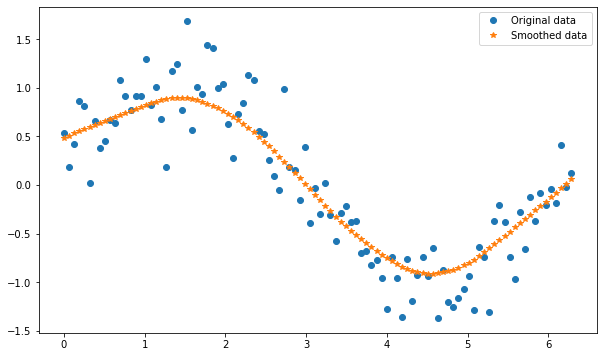

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from statsmodels.nonparametric.smoothers_lowess import lowess

# Generate some random data
np.random.seed(0)
x = np.linspace(0, 2 * np.pi, 100)
y = np.sin(x) + 0.3 * np.random.randn(100)

# Apply Lowess
filtered = lowess(y, x, frac=0.4)

# Create an interpolation function
f = interp1d(filtered[:, 0], filtered[:, 1], kind='cubic')

# Plot the original data and the smoothed data
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'o', label='Original data')
plt.plot(x, f(x), '*', label='Smoothed data')
plt.legend()
plt.show()

## Considerations

There are several factors to consider when using Lowess and Loess:

- **Choice of window size**: The size of the window affects the smoothness of the resulting curve. A larger window produces a smoother curve, but may oversmooth and miss important features of the data. A smaller window can capture these features, but may be more sensitive to noise. The choice of window size is often made based on visual inspection or using cross-validation.

- **Choice of polynomial order**: Lowess and Loess can fit either a line (first order polynomial) or a parabola (second order polynomial) to each section of the data. Fitting a parabola can capture more complex relationships in the data, but can also be more sensitive to noise. The choice between a line and a parabola is often made based on visual inspection or using cross-validation.

- **Weighting function**: The weighting function used in Lowess and Loess assigns more influence to points closer to the focal point of the window. Different weighting functions can be used, and the choice of weighting function can affect the fit of the line. The commonly used weighting function in Lowess and Loess is the tricube weight function, but others can be used as well.

- **Outliers**: Lowess and Loess can be sensitive to outliers. The process of updating the weights based on the distance between the original and new points can help to reduce the influence of outliers. However, in some cases, it may be necessary to apply additional outlier detection methods before applying Lowess or Loess.

It's also worth noting that while Lowess and Loess can produce a visually appealing curve, they do not provide a model that can be easily interpreted or used for prediction outside the range of the data. For these purposes, other methods such as polynomial regression or spline regression may be more appropriate.

## References

- Cleveland, W. S. (1979). Robust Locally Weighted Regression and Smoothing Scatterplots. Journal of the American Statistical Association, 74(368), 829-836.
- Cleveland, W. S., & Devlin, S. J. (1988). Locally Weighted Regression: An Approach to Regression Analysis by Local Fitting. Journal of the American Statistical Association, 83(403), 596-610.
- Python statsmodels library: [Lowess](https://www.statsmodels.org/stable/generated/statsmodels.nonparametric.smoothers_lowess.lowess.html)